# Основы языка Python для аналитиков (семинары)¶
## Урок 4. Визуальный анализ данных
## Задача 1
### 1.1 Скачать данные по ссылке [https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information](https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information) ###
Считать данные с помощью pandas

In [1]:
# Подлючам пеобходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kc_house_data.csv',sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(df['price'], bins=150)
plt.title('Распределение стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Частота (домов');

In [ ]:
df['price'].describe()

Исходя из распределения стоимости можно сделать вывод о том, что в датасете представлены в основном дома начальной и средней ценовой категории. Дорогие дома так же присутствуют в представленной выборке, но их количество - незначительно.

### 1.3 Изучите распределение квадратуры жилой площади

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(df['sqft_living'], bins=150)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Частота домов');

In [ ]:
df['sqft_living'].describe()

В представленном датасете довольно широко представлены дома с различной площадью. Можно выбрать требуемую.

### 1.4 Изучите распределение года постройки

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(df['yr_built'], bins=110)
plt.title('Распределение годов постройки')
plt.xlabel('Год пострройки')
plt.ylabel('Частота домов');

В выборке дома представлены достаточно широко в плане года постройки. Видно, что в те года, когда были экономические кризисы, или мировые войны, дома строились не так часто, что и видно на графике.

## Задача 2
### 2.1 Изучите распределение домов от наличия вида на набережную

- Постройте график
- Сделайте выводы

In [ ]:
plt.figure(figsize=(8, 6))

vc = df['waterfront'].value_counts()
sns.barplot(x=['Отсутствует','Присутствует'], y=vc.values)

plt.title('Распраделение домов с видом на набережную')
plt.xlabel('Вид на набережную')
plt.ylabel('Кол-во домов');

Домов у воды в данной выборке совсем немного.

### 2.2 Изучите распределение этажей домов

In [ ]:
plt.figure(figsize=(8, 6))

vc = df['floors'].value_counts()
sns.barplot(x=vc.index, y=vc.values)

plt.title('Распраделение этажности домов')
plt.xlabel('Этажей')
plt.ylabel('Кол-во домов');

В представленном датасете присутствуют в основном дома 1 и 2 этажей. 0.5 этажа видимо добавлено за присутствие какой-то дополнительной постройки (вроде подвала или веранды)

### 2.3 Изучите распределение состояния домов

In [ ]:
plt.figure(figsize=(8, 6))

vc = df['condition'].value_counts()
sns.barplot(x=vc.index, y=vc.values)

plt.title('Распраделение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Кол-во домов');

В выборке присутствуют дома в основном среднего уровня состояния. Совсем шикарные и совсем убитые дома есть - но их немного.

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Для анализа связи между характеристиками - посторим корреляционную матрицу данных, и на онове ее - построим heatmap график

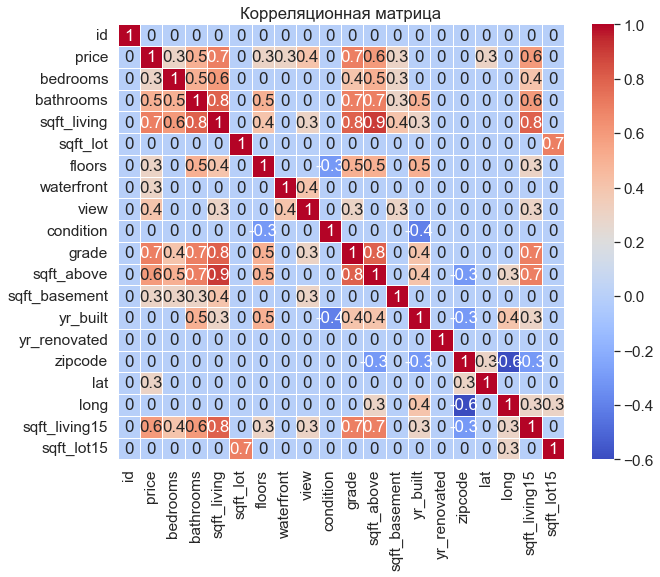

In [4]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Корреляционная матрица');

Из изображения матрицы видно, что довольно сильно на цену недвижимости (price) довольно существенно влияют следующие характеристики:
- sqft_living (0.7) - жилая площадь
- grade (0.7) - класс дома
- sqft_above (0.6) - площадь дома без подвала
- sqft_living15 (0.6) - средняя площадь соседних 15-и рядом стоящих домов
- bathrooms (0.5) - количество ванн

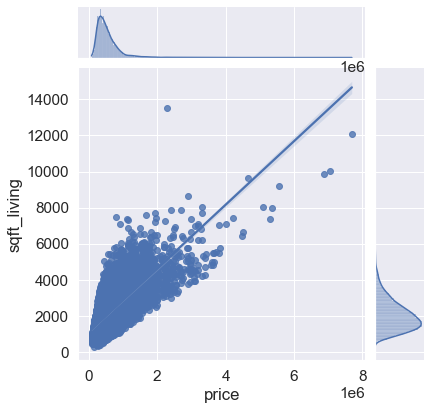

In [15]:
sns.jointplot(data = df, x = 'price', y = 'sqft_living', kind = 'reg');

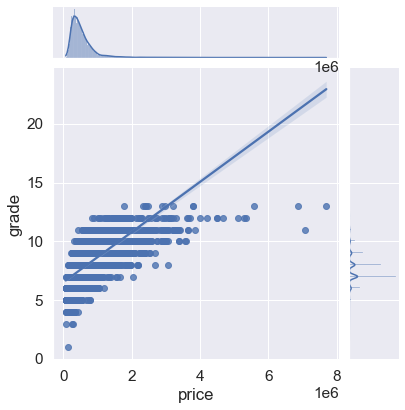

In [12]:
sns.jointplot(data = df, x = 'price', y = 'grade', kind = 'reg');

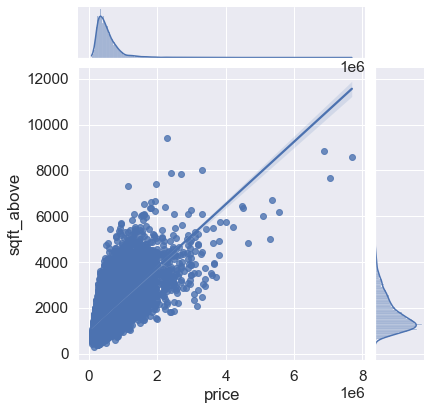

In [16]:
sns.jointplot(data = df, x = 'price', y = 'sqft_above', kind = 'reg');

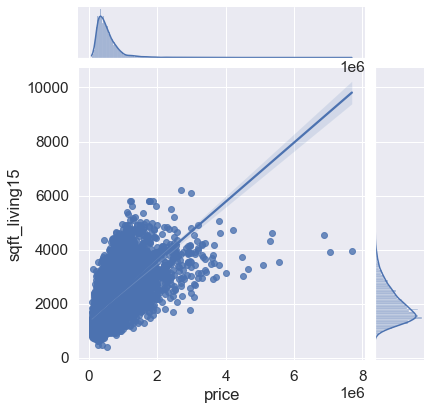

In [17]:
sns.jointplot(data = df, x = 'price', y = 'sqft_living15', kind = 'reg');

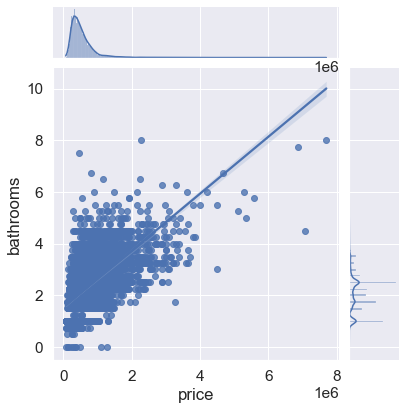

In [19]:
sns.jointplot(data = df, x = 'price', y = 'bathrooms', kind = 'reg');

Исходя из графиков корреляции - можно увидеть зависимость, близкую к лиинейной, влияния соответствующих параметров на окончательную цену дома.